In [7]:
%matplotlib inline

In [1]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml

from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view
import backtesting as bt
import re

In [17]:
del sys.modules['tools.display']

In [8]:
del sys.modules['tools.instruments']
del sys.modules['tools.quotes']
del sys.modules['backtesting']
del sys.modules['backtesting.trader']
del sys.modules['backtesting.system']

In [2]:
with open('backtesting/system1.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'tf05', 'description': '시스템 설명', 'quotes_style': 'bo', 'sectors': 'pre-defined', 'instruments': ['AD', 'CL', 'C', 'LC'], 'from_date': '2000-01-01', 'to_date': None, 'principal': 100000, 'max_system_heat': 0.2, 'max_sector_heat': None, 'max_trade_heat': 0.01, 'max_lots': 3, 'commission': 2.99, 'skid': 0.25, 'metrics': [['ma20', 'MA', 'window=20'], ['ma200', 'MA', 'window=200'], ['volatility', 'ATR', 'window=30'], ['min20', 'MIN', 'window=20'], ['max20', 'MAX', 'window=20']], 'entry_rule': {'long': '(ma200>ma20) | (close>min20)', 'short': None}, 'exit_rule': {'long': None, 'short': None}, 'stop_rule': {'long': 'min20', 'short': 'ma200'}}


In [3]:
trader = bt.Trader(quotes_style='bo', systems=[system1])

In [4]:
system = trader.systems[0]

In [32]:
a={'a':1,'b':'dd'}

In [40]:
a['a'] += 1

In [41]:
a

{'a': 2, 'b': 'dd'}

In [39]:
list(s)

[1, 'dd']

In [2]:
a[1] = 5

In [8]:
a =[{'a':1},{'b':2}]

In [13]:
def test(s):
    s['test'] = '???'

In [14]:
test(a[1])

In [16]:
def defaultheat(a):
    print(a)

In [20]:
test='defaultheat'
eval(test)('asdf')

asdf


In [24]:
from backtesting.book.heat import Heat

In [26]:
h = Heat(1,2,3,4,'DefaultHeat')

In [29]:
h.system_heat()

AttributeError: 'Heat' object has no attribute 'system_heat'

In [32]:
s = [1,1]
def fib(n):
    return s if n==2 else s+=fib(n-1)

SyntaxError: invalid syntax (466116102.py, line 3)

In [31]:
fib(3)

[1, 1]

In [61]:
condition = '(ma200>ma20) | (close>min20)'
for field in fields: 
    condition = re.sub(f"(?<![A-Za-z0-9])({field})(?![A-Za-z0-9])", f"df['{field}']", condition)

In [62]:
condition

"(df['ma200']>df['ma20']) | (df['close']>df['min20'])"

In [52]:
t = 'ma20'
re.sub(f"(?<![A-Za-z0-9]){t}(?![A-Za-z0-9])", "df['ma20']", '(ma200>ma20) | (close>min20)')

"(ma200>df['ma20']) | (close>min20)"

In [38]:
f"({field})"

'(max20)'

In [13]:
trader.quotes.loc[dates[10]]

symbol  field 
AD      open     NaN
        high     NaN
        low      NaN
        close    NaN
        volume   NaN
                  ..
W       high     NaN
        low      NaN
        close    NaN
        volume   NaN
        oi       NaN
Name: 1959-08-17 00:00:00, Length: 270, dtype: float64

DatetimeIndex(['1959-08-03', '1959-08-04', '1959-08-05', '1959-08-06',
               '1959-08-07', '1959-08-10', '1959-08-11', '1959-08-12',
               '1959-08-13', '1959-08-14',
               ...
               '2022-04-21', '2022-04-22', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02',
               '2022-05-03', '2022-05-04'],
              dtype='datetime64[ns]', name='date', length=16028, freq=None)

In [6]:
system = trader.systems[0]

In [17]:
quote = trader.quotes['AD'].iloc[7000]

In [19]:
abs(quote['open'] - quote['high'])

0.000800013542175293

In [21]:
system.signals['AD']

,enter_long,enter_short,exit_long,exit_short,stop_long,stop_short
1959-08-03,False,NaN,NaN,NaN,False,False
1959-08-04,False,NaN,NaN,NaN,False,False
1959-08-05,False,NaN,NaN,NaN,False,False
1959-08-06,False,NaN,NaN,NaN,False,False
1959-08-07,False,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...
2022-04-28,True,NaN,NaN,NaN,False,True
2022-04-29,True,NaN,NaN,NaN,False,True
2022-05-02,True,NaN,NaN,NaN,False,True
2022-05-03,True,NaN,NaN,NaN,False,True


In [24]:
date = quote.name

In [25]:
trader.quotes.index.get_loc(date)

7000

In [58]:
system.quotes['AD']['stop_long'].loc[date]

False

In [27]:
trader.quotes.iloc[6999].name

Timestamp('1987-05-11 00:00:00')

In [38]:
i[1]

symbol  field 
W       open        1047.00
        high        1089.00
        low         1042.25
        close       1076.50
        volume     42332.00
        oi        177503.00
Name: 2022-05-04 00:00:00, dtype: float64

In [2]:
s=[('a',1),('b',2),('a','asdf')]

In [5]:
{ s[0]:s[1] for s in s}

{'a': 'asdf', 'b': 2}

In [19]:
system.quotes

AD                                                    \
                  ma volatility    min20    max20 enter_long stop_long   
date                                                                     
1959-08-03       NaN        NaN      NaN      NaN      False     False   
1959-08-04       NaN        NaN      NaN      NaN      False     False   
1959-08-05       NaN        NaN      NaN      NaN      False     False   
1959-08-06       NaN        NaN      NaN      NaN      False     False   
1959-08-07       NaN        NaN      NaN      NaN      False     False   
...              ...        ...      ...      ...        ...       ...   
2022-04-28  0.738813   2.754602  0.70595  0.76690       True     False   
2022-04-29  0.736765   3.018141  0.70595  0.76690       True     False   
2022-05-02  0.734453   2.621814  0.70355  0.76690       True     False   
2022-05-03  0.732163   2.784565  0.70355  0.76690       True     False   
2022-05-04  0.730338   3.448874  0.70355  0.76005       True     False   

                              BO                        ...         US  \
           stop_short         ma volatility      min20  ... enter_long   
date                                                    ...              
1959-08-03      False        NaN        NaN        NaN  ...      False   
1959-08-04      False        NaN        NaN        NaN  ...      False   
1959-08-05      False        NaN        NaN        NaN  ...      False   
1959-08-06      False        NaN        NaN        NaN  ...      False   
1959-08-07      False        NaN        NaN        NaN  ...      False   
...               ...        ...        ...        ...  ...        ...   
2022-04-28       True  76.194499   1.648556  67.279991  ...       True   
2022-04-29       True  76.984499   1.851431  67.279991  ...       True   
2022-05-02       True  77.506999   2.303545  69.339996  ...       True   
2022-05-03       True  77.982000   2.364416  69.940002  ...       True   
2022-05-04       True  78.561000   2.362859  69.940002  ...       True   

                                         W                              \
           stop_long stop_short         ma volatility    min20   max20   
date                                                                     
1959-08-03     False      False        NaN        NaN      NaN     NaN   
1959-08-04     False      False        NaN        NaN      NaN     NaN   
1959-08-05     False      False        NaN        NaN      NaN     NaN   
1959-08-06     False      False        NaN        NaN      NaN     NaN   
1959-08-07     False      False        NaN        NaN      NaN     NaN   
...              ...        ...        ...        ...      ...     ...   
2022-04-28     False       True  1071.9500   0.962584   985.00  1143.5   
2022-04-29     False       True  1074.3125   0.975491   985.00  1143.5   
2022-05-02     False       True  1077.7375   0.941630   987.25  1143.5   
2022-05-03     False       True  1079.3750   0.858491  1022.25  1143.5   
2022-05-04     False       True  1080.8125   0.871155  1022.25  1143.5   

                                            
           enter_long stop_long stop_short  
date                                        
1959-08-03      False     False      False  
1959-08-04      False     False      False  
1959-08-05      False     False      False  
1959-08-06      False     False      False  
1959-08-07      False     False      False  
...               ...       ...        ...  
2022-04-28       True     False       True  
2022-04-29       True     False       True  
2022-05-02       True     False       True  
2022-05-03       True     False       True  
2022-05-04       True     False       True  

[16028 rows x 315 columns]

In [16]:
system.symbols

['AD',
 'BO',
 'BP',
 'C',
 'CC',
 'CD',
 'CL',
 'CT',
 'DX',
 'EC',
 'ED',
 'ES',
 'FF',
 'FV',
 'G',
 'GC',
 'HG',
 'HO',
 'JY',
 'KC',
 'KW',
 'LC',
 'LN',
 'MD',
 'MP',
 'NE',
 'NG',
 'NK',
 'NQ',
 'O',
 'OJ',
 'PA',
 'PL',
 'RB',
 'RTY',
 'S',
 'SB',
 'SF',
 'SI',
 'SM',
 'SP',
 'TU',
 'TY',
 'US',
 'W']

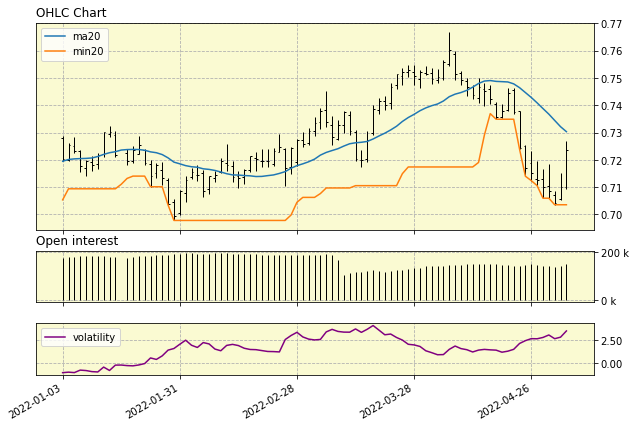

In [8]:
#del sys.modules['tools.display']
#from tools.display import view
date = '2022-01-01'
metrics = system.metrics['AD'][['ma20','volatility', 'min20']][date:]
view(instruments.quotes()['AD'][date:], metrics=metrics)

In [11]:
signals = system.signals.iloc[1000]

In [24]:
for symbol in system.symbols:
    pass

In [39]:
df = pd.DataFrame()

In [47]:
df['AD','test'] = float('nan')

In [48]:
d = pd.concat([system.signals, df], axis=1)

In [50]:
d['AD']['test']

1959-08-03   NaN
1959-08-04   NaN
1959-08-05   NaN
1959-08-06   NaN
1959-08-07   NaN
              ..
2022-04-28   NaN
2022-04-29   NaN
2022-05-02   NaN
2022-05-03   NaN
2022-05-04   NaN
Name: test, Length: 16028, dtype: float64

In [27]:
signals[symbol]['enter_long'] == 

True

In [32]:
system.signals

AD                              BO                       \
           enter_long stop_long stop_short enter_long stop_long stop_short   
date                                                                         
1959-08-03      False     False      False      False     False      False   
1959-08-04      False     False      False      False     False      False   
1959-08-05      False     False      False      False     False      False   
1959-08-06      False     False      False      False     False      False   
1959-08-07      False     False      False      False     False      False   
...               ...       ...        ...        ...       ...        ...   
2022-04-28       True     False       True       True     False      False   
2022-04-29       True     False       True       True     False      False   
2022-05-02       True     False       True       True     False       True   
2022-05-03       True     False       True       True     False       True   
2022-05-04       True     False       True       True     False       True   

                   BP                               C  ...         TU  \
           enter_long stop_long stop_short enter_long  ... stop_short   
date                                                   ...              
1959-08-03      False     False      False      False  ...      False   
1959-08-04      False     False      False      False  ...      False   
1959-08-05      False     False      False      False  ...      False   
1959-08-06      False     False      False      False  ...      False   
1959-08-07      False     False      False      False  ...      False   
...               ...       ...        ...        ...  ...        ...   
2022-04-28       True     False       True       True  ...       True   
2022-04-29       True     False       True       True  ...       True   
2022-05-02       True     False       True       True  ...       True   
2022-05-03       True     False       True       True  ...       True   
2022-05-04       True     False       True       True  ...       True   

                   TY                              US                       \
           enter_long stop_long stop_short enter_long stop_long stop_short   
date                                                                         
1959-08-03      False     False      False      False     False      False   
1959-08-04      False     False      False      False     False      False   
1959-08-05      False     False      False      False     False      False   
1959-08-06      False     False      False      False     False      False   
1959-08-07      False     False      False      False     False      False   
...               ...       ...        ...        ...       ...        ...   
2022-04-28       True     False       True       True     False       True   
2022-04-29       True     False       True       True     False       True   
2022-05-02       True     False       True       True     False       True   
2022-05-03       True     False       True       True     False       True   
2022-05-04       True     False       True       True     False       True   

                    W                       
           enter_long stop_long stop_short  
date                                        
1959-08-03      False     False      False  
1959-08-04      False     False      False  
1959-08-05      False     False      False  
1959-08-06      False     False      False  
1959-08-07      False     False      False  
...               ...       ...        ...  
2022-04-28       True     False       True  
2022-04-29       True     False       True  
2022-05-02       True     False       True  
2022-05-03       True     False       True  
2022-05-04       True     False       True  

[16028 rows x 135 columns]